In [1]:
import pandas as pd
import numpy as np 

from sklearn.datasets import load_iris

from mlxtend.feature_selection \
    import SequentialFeatureSelector as SFS

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
x = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
lr = LogisticRegression()

In [5]:
sfs = SFS(estimator=lr,
          k_features = (1,3),
          forward=True,
          scoring = 'accuracy',
          cv = 5)

In [6]:
sfs = sfs.fit(x, iris.target)

In [7]:
sfs.k_feature_names_

('sepal length (cm)', 'petal length (cm)', 'petal width (cm)')

In [8]:
sfs_results = pd.DataFrame(sfs.get_metric_dict()).\
    T.\
    sort_values(by='avg_score', ascending = False)

In [9]:
sfs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
3,"(0, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(sepal length (cm), petal length (cm), petal w...",0.027096,0.021082,0.010541
1,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal width (cm),)",0.049963,0.038873,0.019437
2,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal length (cm), petal width (cm))",0.032061,0.024944,0.012472


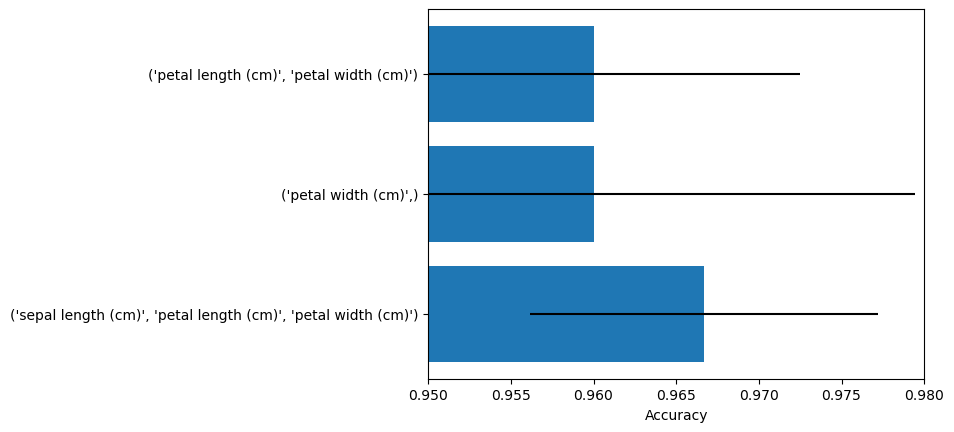

In [11]:
fig, ax = plt.subplots()

y_pos = np.arange(len(sfs_results))
ax.barh(y_pos, sfs_results['avg_score'],\
    xerr = sfs_results['std_err'])

ax.set_yticks(y_pos)
ax.set_yticklabels(sfs_results['feature_names'])
ax.set_xlabel('Accuracy')

plt.xlim([0.95,0.98])

plt.show()